# Clase Tortuga

In [34]:
import numpy as np
import matplotlib.pyplot as plt

pi = np.pi

class TortugaSencilla(object):
    """Tipo de datos 'Tortuga'"""
    
    def __init__(self):
        "Constructor"
        self.P = np.array([0,0]) # Posición
        self.d = np.array([0,1]) # Dirección
        
    def info(self):
        "Muestra información sobre el objeto actual"
        print(f"P={self.P}, d={self.d}")
        
    def adelante(self, cantidad):
        "Mover adelante la tortuga"
        self.P = self.P + cantidad*self.d
    
    def izquierda(self, radianes):
        "Girar a la izquierda (en sentido positivo)"
        matriz = np.array( [
            [np.cos(radianes), -np.sin(radianes)],
            [np.sin(radianes),  np.cos(radianes)] 
        ] )
        self.d = np.dot( matriz, self.d )
        
    def derecha(self, radianes):
        "Girar a la derecha (en sentido negativo)"
        self.izquierda(-radianes)

In [29]:
mi_tortuga = TortugaSencilla()
mi_tortuga.info()

mi_tortuga.adelante(20)
mi_tortuga.info()

mi_tortuga.derecha(pi/2)
mi_tortuga.info()

mi_tortuga.izquierda(pi/2)
mi_tortuga.info()

P=[0 0], d=[0 1]
P=[ 0 20], d=[0 1]
P=[ 0 20], d=[  1.00000000e+00   6.12323400e-17]
P=[ 0 20], d=[ 0.  1.]


## Tortuga que deja rastro de su ruta

In [78]:
class Tortuga(TortugaSencilla):
    def __init__(self, color="green"):
        TortugaSencilla.__init__(self)
        self.color = color
        self.ruta = [self.P] # Ruta de puntos por los que ha pasado la tortuga
        
    def adelante(self, cantidad):
        TortugaSencilla.adelante(self, cantidad)
        self.ruta.append(self.P)
        
    def dibujar(self):
        x = np.array(  [ punto[0] for punto in self.ruta ]  )
        y = np.array(  [ punto[1] for punto in self.ruta ]  )
        plt.plot(x, y, self.color)

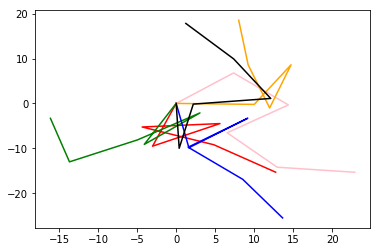

In [82]:
colores = ["red", "green", "blue", "pink", "orange", "black"]
lista_tortugas = [ Tortuga(colores[i]) for i in range(6) ]

for tortu in lista_tortugas:
    for i in range(5):
        tortu.derecha( 2*pi*np.random.rand() )
        tortu.adelante(10)
    tortu.dibujar()